# Investigation of genomic peak regions that are differentially accessible between male and female mice 

This notebook is where we will start investigating the peaks that are differentially accesible between male and female mile 

we have several steps to do

First lets import the libraires we need -you might want to add extras in here as you come across them/use them in your code

In [84]:
import pandas as pd
import numpy as np

1. Read in the table containing the labels of which peaks might be differentially accessible in male vs female mice 

it contains lots of columns that we might need at later stages to do some plotting and subset our data in different ways - have a look at the columns the column we are most interested in is 'category'

In [85]:
peak_labels_df = pd.read_csv('/project/sims-lab/shared/uniq_plus_2023/annotation_of_peaks/differential_accesibility_analysis/peaks_annoated_with_genotype_and_sex_DA.tsv',sep='\t')

In [86]:
peak_labels_df

,peak_id,pos,cs_annotation,cs_TSS_distance,cs_nearest_gene_name,cs_nearest_gene_symbol,cs_basic_anno,gene_biotype,gene_biotype_summary,cs_basic_anno_simple,chd7_regulated,chd7_regulated_up_dowm,chd7_and_sex_regulated,chd7_and_sex_regulated_up_down,sex_regulated,sex_regulated_up_down,category
0,atac_de_peak_chr1_10008911_10009411,chr1:10008911-10009411,Promoter (<=1kb),0,"protein phosphatase 1, regulatory subunit 42",Ppp1r42,Promoter (<=1kb),protein_coding,protein_coding,Promoter_tss_to_3Kb_upstream,0,0,0,0,0,0,not_sex_or_chd7_regulated
1,atac_de_peak_chr1_100104329_100104829,chr1:100104329-100104829,"Intron (ENSMUST00000086738/ENSMUSG00000067028,...",6568,contactin associated protein-like 5B,Cntnap5b,Intron,protein_coding,protein_coding,Intron,0,0,0,0,0,0,not_sex_or_chd7_regulated
2,atac_de_peak_chr1_100119669_100120169,chr1:100119669-100120169,"Intron (ENSMUST00000086738/ENSMUSG00000067028,...",21908,contactin associated protein-like 5B,Cntnap5b,Intron,protein_coding,protein_coding,Intron,0,0,0,0,0,0,not_sex_or_chd7_regulated
3,atac_de_peak_chr1_100122227_100122727,chr1:100122227-100122727,"Intron (ENSMUST00000086738/ENSMUSG00000067028,...",24466,contactin associated protein-like 5B,Cntnap5b,Intron,protein_coding,protein_coding,Intron,0,0,0,0,0,0,not_sex_or_chd7_regulated
4,atac_de_peak_chr1_100128287_100128787,chr1:100128287-100128787,"Intron (ENSMUST00000086738/ENSMUSG00000067028,...",30526,contactin associated protein-like 5B,Cntnap5b,Intron,protein_coding,protein_coding,Intron,0,0,0,0,0,0,not_sex_or_chd7_regulated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112336,atac_de_peak_chrY_90805461_90805961,chrY:90805461-90805961,"Intron (ENSMUST00000179483/ENSMUSG00000096768,...",19875,erythroid differentiation regulator 1,Erdr1,Intron,protein_coding,protein_coding,Intron,0,0,0,0,0,0,not_sex_or_chd7_regulated
112337,atac_de_peak_chrY_90807482_90807982,chrY:90807482-90807982,"Intron (ENSMUST00000179483/ENSMUSG00000096768,...",21896,erythroid differentiation regulator 1,Erdr1,Intron,protein_coding,protein_coding,Intron,0,0,0,0,0,0,not_sex_or_chd7_regulated
112338,atac_de_peak_chrY_90808554_90809054,chrY:90808554-90809054,"Intron (ENSMUST00000179483/ENSMUSG00000096768,...",22968,erythroid differentiation regulator 1,Erdr1,Intron,protein_coding,protein_coding,Intron,0,0,0,0,0,0,not_sex_or_chd7_regulated
112339,atac_de_peak_chrY_90825143_90825643,chrY:90825143-90825643,Distal Intergenic,-11770,NaN,NaN,Distal Intergenic,unprocessed_pseudogene,pseudogene,Distal Intergenic,0,0,0,0,1,1,deffinetly_sex_regulated


In [87]:
peak_labels_df.shape

(112341, 17)

2. Read in the `Features Table` you made with all the TF columns  

In [88]:
feature_table = pd.read_csv('/project/sims-lab/shared/uniq_plus_2023/feature_table/feature_table.tsv', sep= '\t')

3. Subset our peaks 

We aren't going to use all our peaks in our analysis we are first going to 'subset/filter' our peak list to remove peaks we don't want to investigate at the moment 

Use the peak_labels_df and create a new dataframe from it where you have filtered out peaks that have 'NA', 'chd7_regulated' or 'deffinetly_sex_regulated' in the `category` column 

In [89]:
feature_table
# merging two files - feature table and peak label df

merged_df = pd.merge(peak_labels_df_subset, feature_table, on = 'peak_id',  how = 'left')

merged_df

merged_df.dropna()

,peak_id,category,values,0610010K14Rik,5-hmC,5-mC,8-Hydroxydeoxyguanosine,ADP-ribose,AML1-ETO,Acaa2,...,Zfpm1,Zic1,Zic2,Zic3,Zkscan1,Zmiz1,Zmynd11,Zmynd8,Zscan4c,Zscan5b
0,atac_de_peak_chr1_10008911_10009411,not_sex_or_chd7_regulated,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,atac_de_peak_chr1_100104329_100104829,not_sex_or_chd7_regulated,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,atac_de_peak_chr1_100119669_100120169,not_sex_or_chd7_regulated,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,atac_de_peak_chr1_100122227_100122727,not_sex_or_chd7_regulated,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,atac_de_peak_chr1_100128287_100128787,not_sex_or_chd7_regulated,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112336,atac_de_peak_chrY_90805461_90805961,not_sex_or_chd7_regulated,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112337,atac_de_peak_chrY_90807482_90807982,not_sex_or_chd7_regulated,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
112338,atac_de_peak_chrY_90808554_90809054,not_sex_or_chd7_regulated,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
112339,atac_de_peak_chrY_90825143_90825643,deffinetly_sex_regulated,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
peak_labels_df_subset = peak_labels_df[['peak_id', 'category']].copy()

peak_labels_df_subset

,peak_id,category
0,atac_de_peak_chr1_10008911_10009411,not_sex_or_chd7_regulated
1,atac_de_peak_chr1_100104329_100104829,not_sex_or_chd7_regulated
2,atac_de_peak_chr1_100119669_100120169,not_sex_or_chd7_regulated
3,atac_de_peak_chr1_100122227_100122727,not_sex_or_chd7_regulated
4,atac_de_peak_chr1_100128287_100128787,not_sex_or_chd7_regulated
...,...,...
112336,atac_de_peak_chrY_90805461_90805961,not_sex_or_chd7_regulated
112337,atac_de_peak_chrY_90807482_90807982,not_sex_or_chd7_regulated
112338,atac_de_peak_chrY_90808554_90809054,not_sex_or_chd7_regulated
112339,atac_de_peak_chrY_90825143_90825643,deffinetly_sex_regulated


In [131]:
merged_df.category.unique()

# remove rows where category == chd7_regulated or category == definitly_sex_regulated 
# then make new column using np.where() https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

array(['not_sex_or_chd7_regulated', 'chd7_regulated',
       'potentially_sex_regulated', 'deffinetly_sex_regulated', nan],
      dtype=object)

4. make the category column into a numpy array for your labels (i.e. your Y) you will need to turn the text into binary 1 and 0 (0 should probably be the peaks that are not sex or chd7 regulated) 



In [115]:
# numpy_array = peak_labels_df_subset['category']

print(numpy_array)

0         not_sex_or_chd7_regulated
1         not_sex_or_chd7_regulated
2         not_sex_or_chd7_regulated
3         not_sex_or_chd7_regulated
4         not_sex_or_chd7_regulated
                    ...            
112336    not_sex_or_chd7_regulated
112337    not_sex_or_chd7_regulated
112338    not_sex_or_chd7_regulated
112339     deffinetly_sex_regulated
112340     deffinetly_sex_regulated
Name: category, Length: 112341, dtype: object


In [125]:
# peak_labels_df.category.unique()

# peak_labels_df_subset.fillna(0)

# If wanted to combine subcategorys - could do it like so...
#category = ['not_sex_or_chd7_regulated', 'chd7_regulated',
  #     'potentially_sex_regulated', 'deffinetly_sex_regulated', 'nan']
# category = peak_labels_df.category.unique()

categories_to_assign_1 = [
       'potentially_sex_regulated']

binary_values = np.where(np.isin(merged_df['category'], categories_to_assign_1), 1, 0)

binary_values

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
binary_values

array([0, 0, 1, 0, 0])

In [130]:
merged_df

,peak_id,category,values,0610010K14Rik,5-hmC,5-mC,8-Hydroxydeoxyguanosine,ADP-ribose,AML1-ETO,Acaa2,...,Zic2,Zic3,Zkscan1,Zmiz1,Zmynd11,Zmynd8,Zscan4c,Zscan5b,new_column,labels
0,atac_de_peak_chr1_10008911_10009411,not_sex_or_chd7_regulated,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,atac_de_peak_chr1_100104329_100104829,not_sex_or_chd7_regulated,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,atac_de_peak_chr1_100119669_100120169,not_sex_or_chd7_regulated,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,atac_de_peak_chr1_100122227_100122727,not_sex_or_chd7_regulated,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,atac_de_peak_chr1_100128287_100128787,not_sex_or_chd7_regulated,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112336,atac_de_peak_chrY_90805461_90805961,not_sex_or_chd7_regulated,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
112337,atac_de_peak_chrY_90807482_90807982,not_sex_or_chd7_regulated,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
112338,atac_de_peak_chrY_90808554_90809054,not_sex_or_chd7_regulated,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
112339,atac_de_peak_chrY_90825143_90825643,deffinetly_sex_regulated,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0


In [112]:
peak_labels_df_subset.columns = ['peak_id', 'category'] 

category = ['not_sex_or_chd7_regulated', 'chd7_regulated',
       'potentially_sex_regulated', 'deffinetly_sex_regulated', 'nan']
#binary_array = np.array([0, 0, 1, 0, 0])
 #binary_array = np.pad(binary_array, (0, len(category) - len(binary_array)))
    
binary_values = np.where(np.isin(category, categories_to_assign_1), 1, 0)

In [129]:
# Adding the binary values column 

merged_df['labels'] = binary_values

In [136]:
merged_df = merged_df.drop('new_column', axis=1)

In [139]:
merged_df

values_to_subset = ['NA', 'chd7_regulated', 'deffinetly_sex_regulated']

subset_values_df = merged_df[~merged_df['category'].isin(values_to_subset)]

subset_values_df

,peak_id,category,0610010K14Rik,5-hmC,5-mC,8-Hydroxydeoxyguanosine,ADP-ribose,AML1-ETO,Acaa2,Acss2,...,Zic1,Zic2,Zic3,Zkscan1,Zmiz1,Zmynd11,Zmynd8,Zscan4c,Zscan5b,labels
0,atac_de_peak_chr1_10008911_10009411,not_sex_or_chd7_regulated,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,atac_de_peak_chr1_100104329_100104829,not_sex_or_chd7_regulated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,atac_de_peak_chr1_100119669_100120169,not_sex_or_chd7_regulated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,atac_de_peak_chr1_100122227_100122727,not_sex_or_chd7_regulated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,atac_de_peak_chr1_100128287_100128787,not_sex_or_chd7_regulated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112334,atac_de_peak_chrY_90803356_90803856,not_sex_or_chd7_regulated,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
112335,atac_de_peak_chrY_90804817_90805317,not_sex_or_chd7_regulated,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0
112336,atac_de_peak_chrY_90805461_90805961,not_sex_or_chd7_regulated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
112337,atac_de_peak_chrY_90807482_90807982,not_sex_or_chd7_regulated,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [106]:
peak_labels_df_subset.columns

Index(['peak_id', 'category'], dtype='object')

In [ ]:
peak_labels_df_subset = peak_labels_df[['peak_id', 'category']].copy()

peak_labels_df_subset

6. Split the data into a training and testing subset 

In [249]:
from sklearn.model_selection import train_test_split

# cUTTING OFF PEAJ IDS AND CATEGORY COLUMNBS
X=subset_values_df.iloc[:, 2:-1].values

# Adjusting to view labels only 
y=subset_values_df.iloc[:, -1:].values

In [252]:
X_df=subset_values_df.iloc[:, 2:-1]
X_df.columns

Index(['0610010K14Rik', '5-hmC', '5-mC', '8-Hydroxydeoxyguanosine',
       'ADP-ribose', 'AML1-ETO', 'Acaa2', 'Acss2', 'Actb', 'Adnp',
       ...
       'Zfpm1', 'Zic1', 'Zic2', 'Zic3', 'Zkscan1', 'Zmiz1', 'Zmynd11',
       'Zmynd8', 'Zscan4c', 'Zscan5b'],
      dtype='object', length=881)

In [172]:
X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [173]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [178]:
# Checking diemsions 
subset_values_df.iloc[:, -1:]

,labels
0,0
1,0
2,0
3,0
4,0
...,...
112334,0
112335,0
112336,0
112337,0


In [ ]:
# cOME BACK TO THIS

In [183]:
y = np.ravel(y)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [181]:
# Converting each categorical value into binary vector 
from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)

In [162]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

In [164]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y_train_encoded = encoder.fit_transform(y_train)

7. Run the random forest model 


In [232]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

7.5. Put testing data into the model 

In [231]:
predictions = model.predict(X_test)

predictions

array([0., 0., 0., ..., 0., 0., 0.])

8. What is the accuracy of the model? 

In [233]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)

f"Accuracy: {accuracy:.2f}"

'Accuracy: 1.00'

In [ ]:
# Accuracy of code was 1.00 = all predictions made were correct 

9. Can we get out the important features from the model? 

In [238]:
X_train = X_train.ravel()

In [254]:
feature_scores = pd.Series(model.feature_importances_, index=X_df.columns).sort_values(ascending=False)
feature_scores

Zscan5b           0.109591
Atm               0.023381
Succinyllysine    0.015179
Foxc2             0.013509
Sfmbt2            0.013507
                    ...   
Ccar1             0.000000
Ccnk              0.000000
Prdm5             0.000000
Prdm16            0.000000
Ezh2              0.000000
Length: 881, dtype: float64

8. Get names and workout wat columns are highest in the feature impprtnsnce list + get a list of the top 20 features

In [196]:
# Checking if feature_names array matches the number of features 

if len(feature_names) != len(feature_importances):
    print("Number of feature names doesn't match the number of feature importances.")
else:
    # Sort indices based on importance
    sorted_indices = np.argsort(feature_importances)[::-1]

Number of feature names doesn't match the number of feature importances.


In [247]:
model.feature_importances_

array([5.44319528e-04, 8.48166424e-04, 1.14296407e-03, 2.58298977e-03,
       0.00000000e+00, 5.62655194e-06, 3.29196536e-05, 0.00000000e+00,
       0.00000000e+00, 1.65005442e-03, 4.25606387e-04, 1.19546703e-05,
       0.00000000e+00, 2.20530868e-03, 1.19115117e-04, 2.39404077e-04,
       7.36056509e-06, 2.29928260e-04, 0.00000000e+00, 1.49174240e-03,
       0.00000000e+00, 1.70615598e-03, 5.13098849e-04, 0.00000000e+00,
       1.72202459e-03, 0.00000000e+00, 1.99069360e-03, 5.55440859e-04,
       2.21293598e-06, 0.00000000e+00, 0.00000000e+00, 8.67623746e-07,
       0.00000000e+00, 4.88783662e-05, 8.54928033e-04, 1.35436189e-03,
       2.94651197e-04, 0.00000000e+00, 6.88904403e-04, 1.67862757e-03,
       0.00000000e+00, 2.33805024e-02, 0.00000000e+00, 6.56671185e-05,
       1.05859228e-03, 4.91989505e-05, 0.00000000e+00, 7.78914344e-04,
       2.08231420e-03, 0.00000000e+00, 1.91706543e-03, 1.91994177e-04,
       1.40952204e-03, 0.00000000e+00, 2.71648335e-05, 8.33422437e-04,
      

In [259]:
pd.DataFrame(feature_scores)
    #feature_scores.head(10)

,0
Zscan5b,0.109591
Atm,0.023381
Succinyllysine,0.015179
Foxc2,0.013509
Sfmbt2,0.013507
...,...
Ccar1,0.000000
Ccnk,0.000000
Prdm5,0.000000
Prdm16,0.000000


Visual feature scores of the features

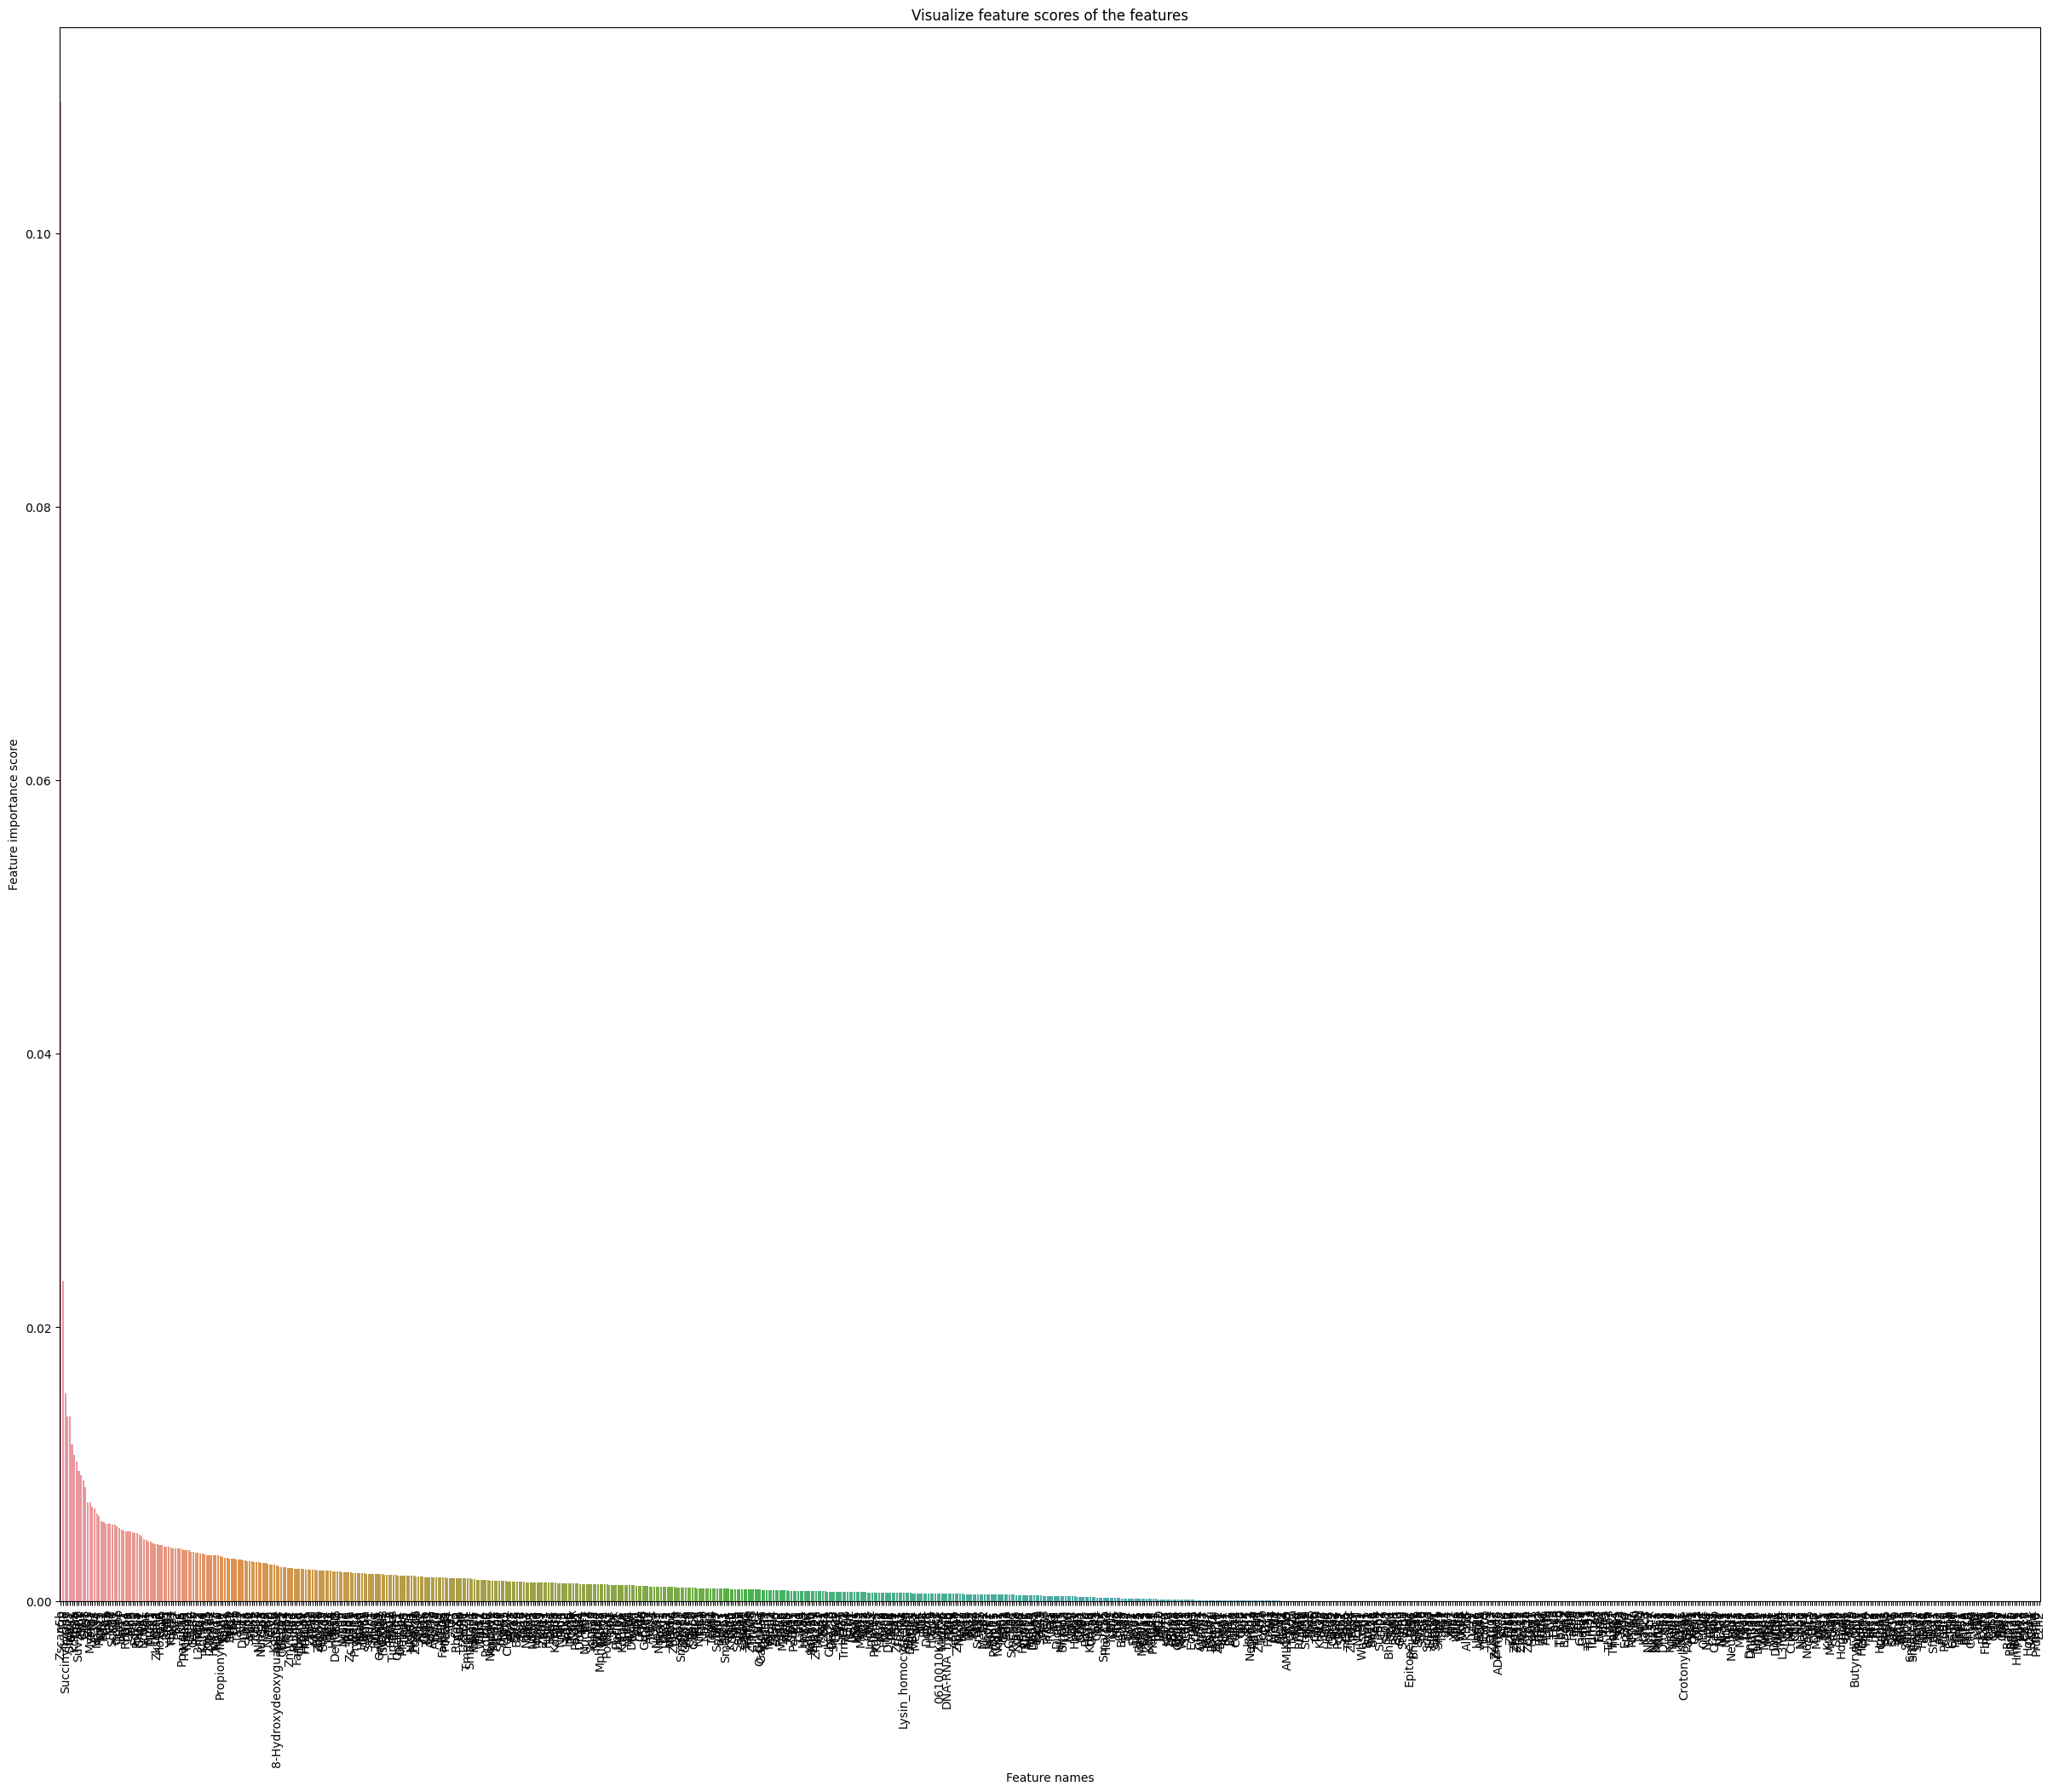

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30, 24))
ax = sns.barplot(x=feature_scores.index, y=feature_scores.values)
ax.set_title("Visualize feature scores of the features")
ax.set_xlabel("Feature names")
ax.set_ylabel("Feature importance score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  
plt.show()

In [271]:
feature_scores_top_20 = feature_scores.head(20)
feature_scores_top_20

Zscan5b           0.109591
Atm               0.023381
Succinyllysine    0.015179
Foxc2             0.013509
Sfmbt2            0.013507
Glyr1             0.011443
Kdm3a             0.010692
Tfam              0.010168
Suv39h2           0.009486
Elk3              0.009178
Chuk              0.008830
Glis3             0.008315
Zeb1              0.007178
Mysm1             0.007173
Setd2             0.006875
Ncl               0.006786
Npas4             0.006384
Prmt5             0.006232
Dlx1              0.005822
Prm1              0.005762
dtype: float64

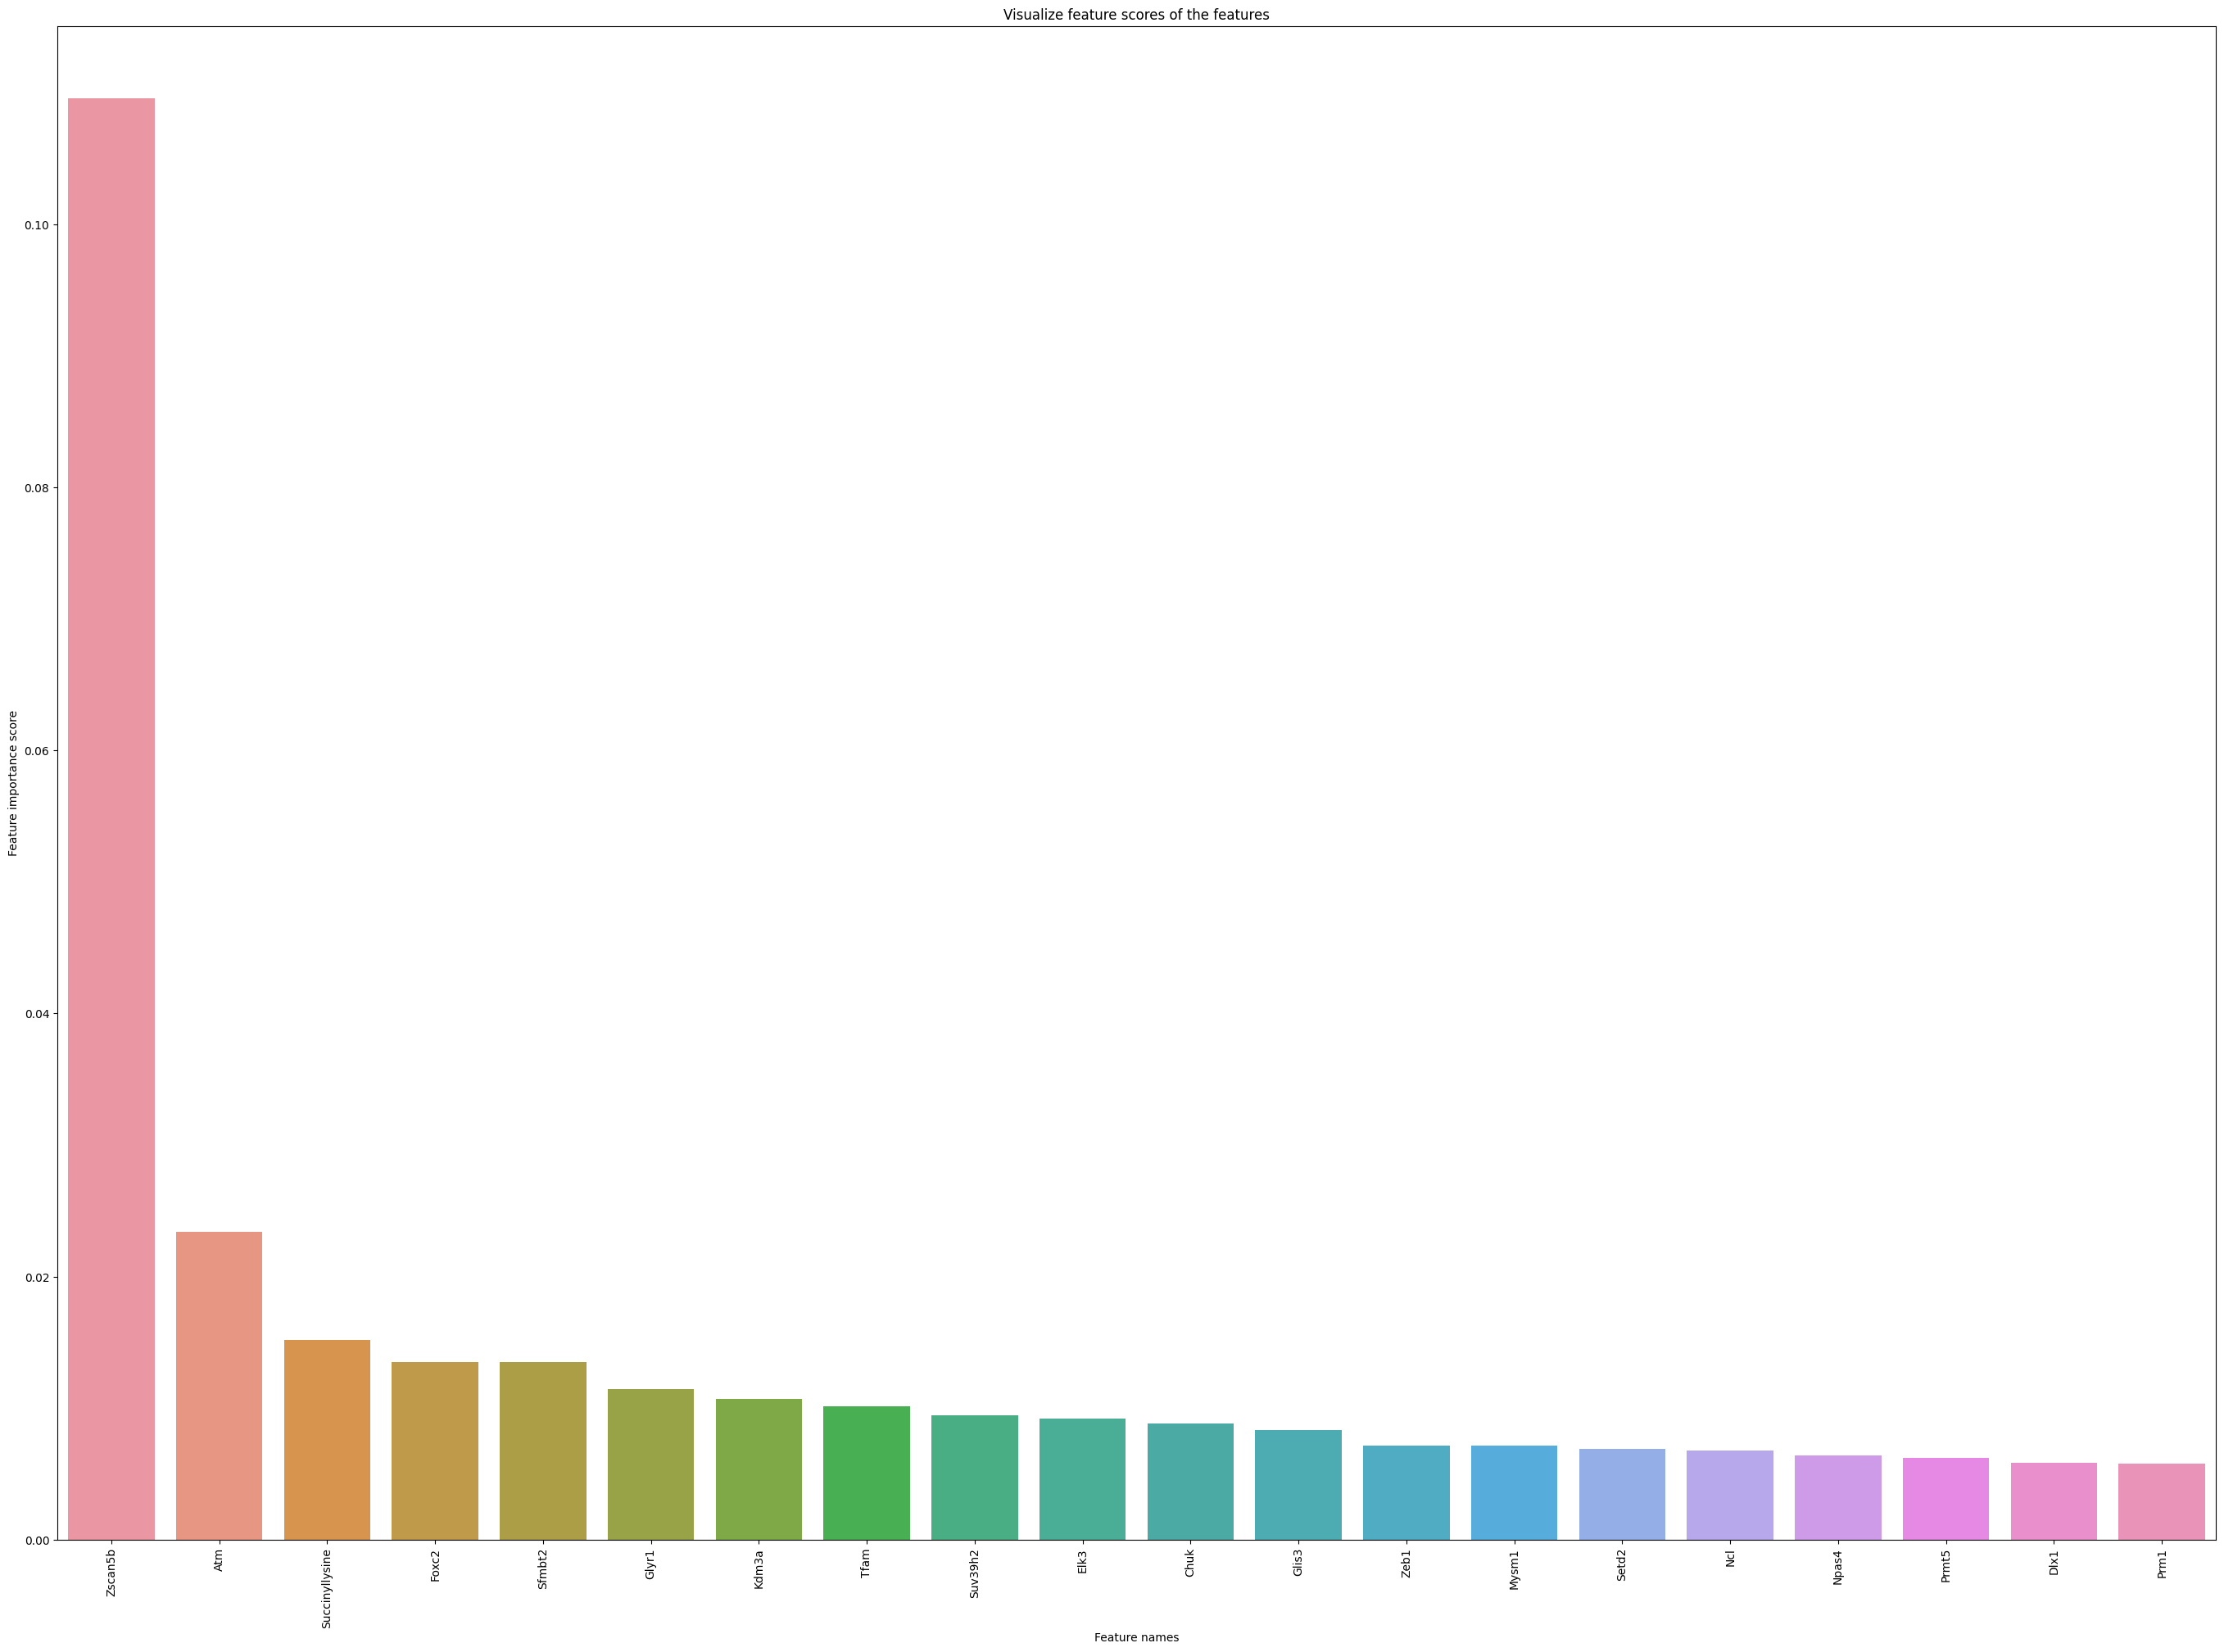

In [272]:
plt.figure(figsize=(34, 24)) #Plot size
ax = sns.barplot(x=feature_scores_top_20.index, y=feature_scores_top_20.values) # creating bar graph axis
ax.set_title("Visualize feature scores of the features")
ax.set_xlabel("Feature names")
ax.set_ylabel("Feature importance score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  
plt.show()

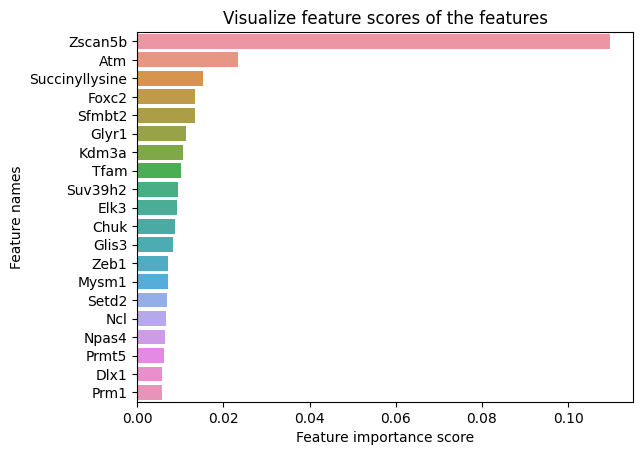

In [275]:
#plt.figure(figsize=(34, 24)) #Plot size
ax = sns.barplot(x=feature_scores_top_20.values, y=feature_scores_top_20.index) # creating bar graph axis
ax.set_title("Visualize feature scores of the features")
ax.set_ylabel("Feature names")
ax.set_xlabel("Feature importance score")
#ax.set_yticklabels(ax.get_yticklabels(), rotation=90)  
plt.show()